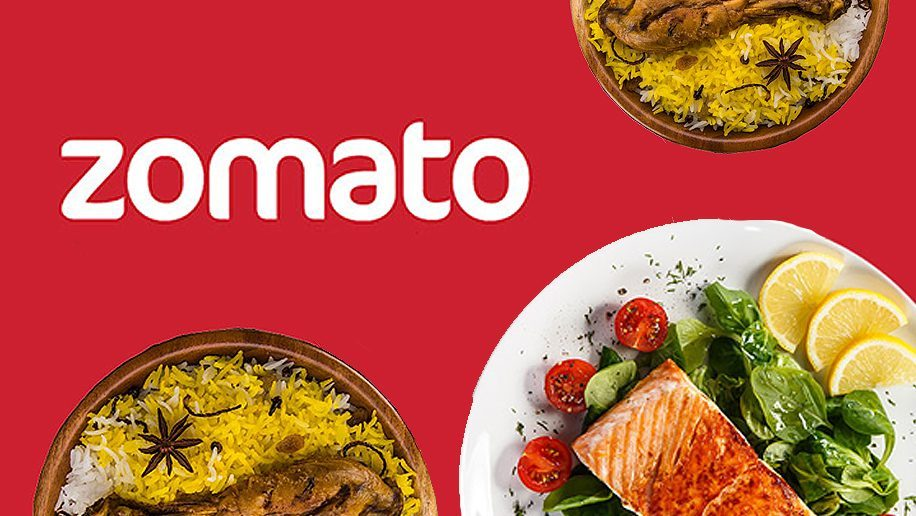

# What I will cover in this notebook
1. [Data Preprocessing](#1)
2. [Data Visualization](#2)
3. [Data Preprocessing for ml model](#3)
    * [Feature Selection](#4)
        * [Pearson Correlation](#5)
        * [Mutual Information](#6)
        * [Feature Importance](#7)
        * [Location](#15)
        
4. Predict rating of newly opened restaurants
5. Will create a Recommendation system though not sure weather in this notebook or not

* [Reference](#69)

#### Columns description

1. url contains the url of the restaurant in the zomato website

2. address contains the address of the restaurant in Bengaluru

3. name contains the name of the restaurant

4. online_order whether online ordering is available in the restaurant or not

5. book_table table book option available or not

6. rate contains the overall rating of the restaurant out of 5

7. votes contains total number of rating for the restaurant as of the above mentioned date

8. phone contains the phone number of the restaurant

9. location contains the neighborhood in which the restaurant is located

10. rest_type restaurant type

11. dish_liked dishes people liked in the restaurant

12. cuisines food styles, separated by comma

13. approx_cost(for two people) contains the approximate cost for meal for two people

14. reviews_list list of tuples containing reviews for the restaurant, each tuple

15. menu_item contains list of menus available in the restaurant

16. listed_in(type) type of meal

17. listed_in(city) contains the neighborhood in which the restaurant is listed

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df= pd.read_csv('../input/zomato-bangalore-restaurants/zomato.csv')
df.head(2)

In [ ]:
a,b=df.shape  # Since shape return tuple thus storing value in a and b 
print('Data Point= ',a*b)
df.shape

In [ ]:
# Counting NaN in each Columns
# We can also df.info()
df.isnull().sum()

In [ ]:
# .info helps us check NaN values and data type of each column
df.info()

<a id=1>

# Data Preprocessing

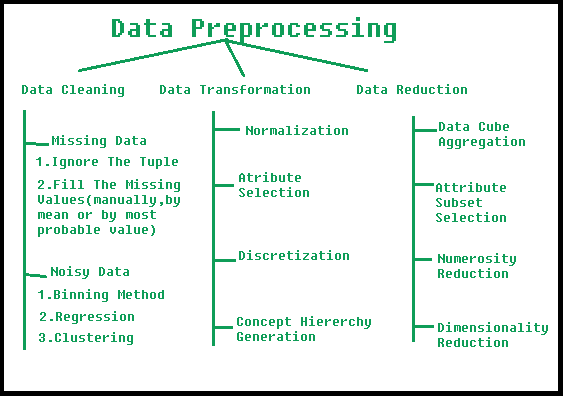
    
[Image Source](https://www.geeksforgeeks.org/data-preprocessing-in-data-mining/)

In [ ]:
# Dropping Url and Phone no as they are useless for this project


df.drop(['url','phone','dish_liked'], axis =1, inplace=True)

In [ ]:
# Dropping duplicates.

print('Number of Dublicate values in Data Frame = ',df.duplicated().sum())
df.drop_duplicates(inplace=True)

In [ ]:
# Remove the NaN values from the dataset
df.dropna(how='any',inplace=True)

In [ ]:
# clean Rating column
#Removing '/5' from Rates

df['rate'].unique()
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')
df['rate'].head()

In [ ]:
# Cleaning individual columns.


# Cost for 2 people is in object data type we need to convert it to int
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',','.'))
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)
df.info()

In [ ]:
# Checking no of resturants listed on Zomato
# There are 8792 resturants listed on Zomato in Bangalore city


# k = df.name.unique()
# len(k)

df.name.value_counts()

<a id=2>
    
# Visualization

In [ ]:
df.location.value_counts()
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
sns.countplot('location', data=df);

In [ ]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
sns.countplot('listed_in(city)', data=df);

In [ ]:
# Famous restaurant chains in Bengaluru
plt.figure(figsize=(15,7))
chains=df['name'].value_counts()[:25]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("25 Most Famous restaurant chains in Bangaluru on Zomato",size=20,pad=20)
plt.xlabel("Number of outlets",size=15);

In [ ]:
# Highest Voted Restaurant
# df.groupby('name')['votes'].max().nlargest(10).plot.bar()

y = df.groupby('name')['votes'].max().nlargest(20).index 
x = df.groupby('name')['votes'].max().nlargest(20)

plt.figure(figsize=(15,7))
sns.barplot(x,y,palette='Set1');
plt.title("20 Most voted restaurant in Bangaluru on Zomato",size=20,pad=20)
plt.xlabel("Number of votes",size=15);
plt.ylabel("Name of Resturant",size=15);

In [ ]:
# Top 20 Most Expensive restaurant with approx cost for 2 people
data=df.copy()
data.set_index('name',inplace=True)

plt.figure(figsize=(15,20))
plt.subplot(2,1,1)
sns.barplot(x = data['approx_cost(for two people)'].nlargest(70),y = data['approx_cost(for two people)'].nlargest(70).index,palette='Set1');
plt.title("15 Most expensive restaurant in Bangaluru on Zomato",size=20,pad=20)
plt.xlabel("Avg Cost for two",size=15);
plt.ylabel("Name of Resturant",size=15);


plt.subplot(2,1,2)
sns.barplot(x = data['approx_cost(for two people)'].nsmallest(30),y = data['approx_cost(for two people)'].nsmallest(30).index,palette='Set1');
plt.title("15 Least expensive restaurant in Bangaluru on Zomato",size=20,pad=20)
plt.xlabel("Avg Cost for two",size=15);
plt.ylabel("Name of Resturant",size=15);

# Location

df.groupby('location')['name'].unique()

restaurant=[] 
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))
    
df_total=pd.DataFrame(zip(location,restaurant)) #creating data frame
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
# df_total.sort_values(by='restaurant').tail(10)




df_total.sort_values(by='restaurant', ascending=False).head(20).plot.bar(figsize=(11,7));
# sns.barplot(x = df_total.sort_values(by='restaurant', ascending=False).tail(20) ,y = df_total.sort_values(by='restaurant', ascending=False).tail(20).index ,palette='Set1')
plt.title("20 Most dense location for restaurant in Bangaluru on Zomato",size=20,pad=20);
plt.xlabel("Location",size=15);
plt.ylabel("Number of Resturant",size=15);


#data['approx_cost(for two people)'].nlargest(10).plot.bar()

In [ ]:
# Why sns is not working with this df_total

'''df.groupby('location')['name'].unique()

restaurant=[] 
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))
    
df_total=pd.DataFrame(zip(location,restaurant)) #creating data frame
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
# df_total.sort_values(by='restaurant').tail(20)

df_total.sort_values(by='restaurant').tail(20).plot.bar()

# sns.barplot(x = df_total.sort_values(by='restaurant').tail(20) ,y = df_total.sort_values(by='restaurant').tail(20).index ,palette='Set1')
plt.title("20 Most dense location for restaurant in Bangaluru on Zomato",size=20,pad=20)
plt.xlabel("Avg Cost for two",size=15)
plt.ylabel("Name of Resturant",size=15)
''';

In [ ]:
df['listed_in(city)'].value_counts()

In [ ]:
df['listed_in(type)'].value_counts()

In [ ]:
pie, ax = plt.subplots(figsize=[15,10])
plt.subplot(1,3,1)
labels = df['listed_in(type)'].value_counts().keys()
plt.pie(x=df['listed_in(type)'].value_counts(), autopct="%.1f%%", explode=[0.05]*7, labels=labels, pctdistance=0.5,shadow=True)
plt.title("Resturant listed by", fontsize=14);
pie.savefig("Resturant listed by.png")

plt.subplot(1,3,2)
labels = df['rest_type'].value_counts()[:15].keys()
plt.pie(x=df['rest_type'].value_counts()[:15], autopct="%.1f%%", explode=[0.05]*15, labels=labels, pctdistance=0.5,shadow=True)
plt.title("Resturant by Food type", fontsize=14);
pie.savefig("Resturant by Food type.png")

plt.subplot(1,3,3)
x=df['online_order'].value_counts()
labels=['accepted','not accepted']
plt.title("Restuarants do not accept online orders", fontsize=14);
plt.pie(x,explode=[0.0,0.1],autopct='%1.1f%%', labels=labels)

plt.tight_layout()

In [ ]:
plt.subplot(1,2,1)
sns.countplot('book_table', data=df)

plt.subplot(1,2,2)
sns.countplot('online_order', data=df)


plt.tight_layout()



In [ ]:
cu = df['cuisines'].value_counts()[:12] # top 12
plt.figure(figsize=(8,4))
plt.grid(True)
sns.barplot(cu,cu.index)

In [ ]:
print('Mean cost for eating for 2 person = ', df['approx_cost(for two people)'].mean())

In [ ]:
plt.figure(figsize=(15,4))
plt.suptitle("Cost of meal for 2", fontweight='bold', fontsize=15)

plt.subplot(1,3,1)
sns.distplot(df['approx_cost(for two people)'])

plt.subplot(1,3,2)
sns.boxplot(x=df['approx_cost(for two people)'])

plt.subplot(1,3,3)
df['approx_cost(for two people)'].hist()

plt.tight_layout()

In [ ]:
plt.figure(figsize=(15,4))
plt.suptitle("Votes", fontweight='bold', fontsize=15)

plt.subplot(1,3,1)
sns.distplot(df['votes'])

plt.subplot(1,3,2)
sns.boxplot(x=df['votes'])

plt.subplot(1,3,3)
df.votes.hist()

plt.tight_layout()

In [ ]:
plt.figure(figsize=(15,4))
plt.suptitle("Rating", fontweight='bold', fontsize=15)

plt.subplot(1,3,1)
sns.distplot(df['rate'])

plt.subplot(1,3,2)
sns.boxplot(x=df['rate'])

plt.subplot(1,3,3)
df.rate.hist()

plt.tight_layout()

<a id=3>
    
# Pre-procesing for Machine Learning

In [ ]:
#Encode the input Variables
def Encode(df):
    for column in df.columns[~df.columns.isin(['rate', 'approx_cost(for two people)', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

zomato = Encode(df.copy())
zomato.head(2)

<a id=4>
    
# Feature Selection
    
 

<a id=5>

## 1. Pearson Correlation
    
    
The Pearson correlation method is the most common method to use for numerical variables; it assigns a value between − 1 and 1, where 0 is no correlation, 1 is total positive correlation, and − 1 is total negative correlation. This is interpreted as follows: a correlation value of 0.7 between two variables would indicate that a significant and positive relationship exists between the two. A positive correlation signifies that if variable A goes up, then B will also go up, whereas if the value of the correlation is negative, then if A increases, B decreases.
[Source](https://www.sciencedirect.com/topics/computer-science/pearson-correlation)

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(zomato.corr(), annot=True);

<a id=6>
    
    
## 2. Mutual Information

The Mutual Information between two random variables measures non-linear relations between them. Besides, it indicates how much information can be obtained from a random variable by observing another random variable.

It is closely linked to the concept of entropy. This is because it can also be known as the reduction of uncertainty of a random variable if another is known. Therefore, a high mutual information value indicates a large reduction of uncertainty whereas a low value indicates a small reduction. If the mutual information is zero, that means that the two random variables are independent.

**But, how is mutual information calculated?**
[Answer](https://quantdare.com/what-is-mutual-information/)

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
y=zomato['rate']
x=zomato.drop('rate', axis=1)

In [ ]:
mi=mutual_info_regression(x,y)

mi=pd.Series(mi)
mi.index=x.columns
mi.sort_values(ascending=False).plot.bar(figsize=(7,4));

<a id=7>

## Feature Importance( **ExtraTrees** )
    
    
Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it’s classification result. In concept, it is very similar to a Random Forest Classifier and only differs from it in the manner of construction of the decision trees in the forest.

Each Decision Tree in the Extra Trees Forest is constructed from the original training sample. Then, at each test node, Each tree is provided with a random sample of k features from the feature-set from which each decision tree must select the best feature to split the data based on some mathematical criteria (typically the Gini Index). This random sample of features leads to the creation of multiple de-correlated decision trees.

To perform feature selection using the above forest structure, during the construction of the forest, for each feature, the normalized total reduction in the mathematical criteria used in the decision of feature of split (Gini Index if the Gini Index is used in the construction of the forest) is computed. This value is called the Gini Importance of the feature. To perform feature selection, each feature is ordered in descending order according to the Gini Importance of each feature and the user selects the top k features according to his/her choice.
    
[Read More](https://www.geeksforgeeks.org/ml-extra-tree-classifier-for-feature-selection/)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

In [ ]:
# Plot on graph
fi= pd.Series(model.feature_importances_,index=x.columns)
fi.nlargest(12).plot(kind='barh',figsize=(10,6))
plt.title("Feature Importance/Extra Trees")
plt.show()

### Analysing relation between approx_cost(for two people) and rating

In [ ]:
plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=df)

plt.subplot(1,3,2)
sns.scatterplot(x="rate",y='online_order',hue='votes',data=df)

plt.subplot(1,3,3)
plt.grid(True)
sns.barplot(x='votes',y='online_order',data=df)
#sns.scatterplot(x="votes",y='online_order',data=df)

plt.show()

### Analysing the affects of votes on the basis of the fact that a restaurant is accepting the orders online or not.

In [ ]:
plt.subplot(1,2,1)
sns.boxplot(x='online_order',y='votes',data=df)

# Analysing the affects of price on the basis of the fact that a restaurant is accepting the orders online or not.
plt.subplot(1,2,2)
plt.title("Affect of cosr on mode of order")
sns.boxplot(x='online_order',y='approx_cost(for two people)',data=df)

plt.tight_layout()

<a id=15>
    
    
## Location

In [ ]:
!pip install geopy

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
len(df['location'].unique())
locations=pd.DataFrame({"Name":df['location'].unique()})
locations['new_Name']='Bangalore '+locations['Name']

In [ ]:
locations.head(3)

In [ ]:
# We have found out latitude and longitude of each location listed in the dataset using geopy.

lat_lon=[] # list that will store the lat and lon
geolocator=Nominatim(user_agent="app") # to establish connection 
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan) # if no location is there
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

In [ ]:
locations['geo_loc']=lat_lon
locations.to_csv('zomato_locations.csv',index=False)

In [ ]:
locations.head(3)

In [ ]:
# This is used to plot maps
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())
Rest_locations.columns=['Name','count']
Rest_locations.head(3)

In [ ]:
# now combine both the dataframes
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Restaurant_locations.head(3)

In [ ]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

np.array(Restaurant_locations['geo_loc'])

#################### unzip it  ##################################
lat,lon=zip(*np.array(Restaurant_locations['geo_loc']))

In [ ]:
# Adding lat and lon

Restaurant_locations['lat']=lat
Restaurant_locations['lon']=lon

Restaurant_locations.head(3)

In [ ]:
!pip install folium

In [ ]:
import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()

In [ ]:
HeatMap(Restaurant_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [ ]:
basemap

### North Indian Resturants zone


In [ ]:
df_url=pd.read_csv('../input/zomato-bangalore-restaurants/zomato.csv')

In [ ]:
df2= df_url[df_url['cuisines']=='North Indian']
df2.head()
north_india=df2.groupby(['location'],as_index=False)['url'].agg('count')
north_india.columns=['Name','count']
north_india.head()

In [ ]:
north_india=north_india.merge(locations,on="Name",how='left').dropna()
north_india.head(3)

In [ ]:
north_india['lan'],north_india['lon']=zip(*north_india['geo_loc'].values)
north_india.drop(['geo_loc'],axis=1)

### Resturants serving North Indian Cuisine

In [ ]:
basemap=generateBaseMap()
HeatMap(north_india[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

### Resturants serving South Indian Cuisine

In [ ]:
df3= df[df['cuisines']=='South Indian']
south_india=df2.groupby(['location'],as_index=False)['url'].agg('count')
south_india.columns=['Name','count']
south_india=south_india.merge(locations,on="Name",how='left').dropna()
south_india['lan'],south_india['lon']=zip(*south_india['geo_loc'].values)

south_india=south_india.drop(['geo_loc'],axis=1)
# south_india.head()

basemap=generateBaseMap()
HeatMap(south_india[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

In [ ]:
zomato.location.unique()

# In next update I will add
1. Mutual Information
2. Machine learning to predict rating of newly opened resturant.

### **RECOMMENDATION SYSTEM** (Not sure will add in this notebook or new)

In [ ]:
df.head(3)

<a id=69>

# Reference

* [For EDA](https://www.kaggle.com/chirag9073/zomato-restaurants-analysis-and-prediction#Regression-Analysis)

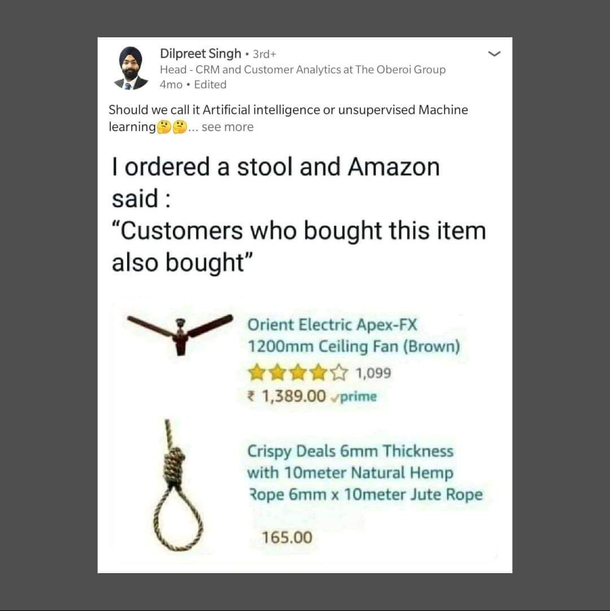